# Geometric Transformations

Image Transformation involves the transformation of image data in order to retrieve information from the image or preprocess the image for further usage. OpenCV provides two transformation functions, `cv.warpAffine` and `cv.warpPerspective`, with which you can perform all kinds of transformations. `cv.warpAffine` takes a 2x3 transformation matrix while `cv.warpPerspective` takes a 3x3 transformation matrix as input. 

The main functional difference between them is affine transformations always map parallel lines to parallel lines, while homographies can map parallel lines to intersecting lines, or vice-versa.

[Geometric Transformations of Images](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html)

[Affine vs. Perspective Tranformations](https://stackoverflow.com/questions/45637472/opencv-transformationmatrix-affine-vs-perspective-warping)

![](https://i.stack.imgur.com/dboqF.jpg)

Affine transformations can be thought of as a subset of all possible perspective transformations, aka homographies.


Starting with a regular square, you can see that translational and Euclidean transformations (rotation, uniform scaling, and translation) keep the aspect ratio; the result on applying is still a square. However, affine transformations can squash the square into a rectangle in either direction, and it can also provide a shear/skew to the square. But notice that the shape after the affine transformation is applied is a parallelogram---the sides are still parallel. With a homography, this need not be the case. The parallel lines could be warped so that they intersect. So the result of a rectangle transformed by an homography is a general quadrilateral, while the result of a rectangle transformed by an affine transformation is always a parallelogram.

The functions `warpAffine` and `warpPerspective` don't necessarily need to be two distinct functions. Any affine transformation written as a 3x3 matrix could be passed into `warpPerspective` and transformed all the same; in other words, a function like `warpPerspective` could have been made to take 2x3 and 3x3 matrices. However, perspective transformations apply extra steps because of the additional row, so it's not as efficient to do that. Also, `warpPerspective` performs a division, so there could be larger floating-point errors introduced in the operations, and that's just unnecessary for affine transformations. Lastly, inverting an affine warp can be done without creating a 3x3 square matrix and inverting that. So all in all, it just makes sense to keep them as separate functions.

## Importing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Loading the Image

I have marked some points which is also to be passed on the functions

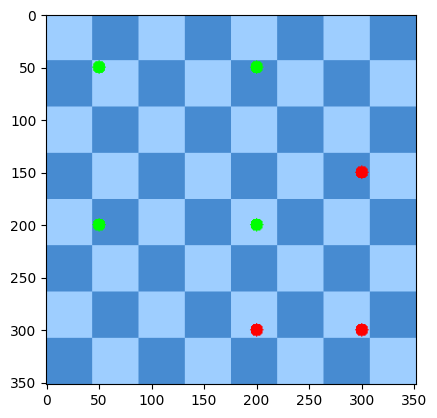

In [2]:
img = cv2.imread("../DATA/flat_chessboard.png")

points_affine = np.float32([(300, 150), (200, 300), (300, 300)])
points_homography = np.float32([(50, 50), (200, 50), (50, 200), (200, 200)])

for x, y in points_affine:
    cv2.circle(img, (int(x), int(y)), 6, (255, 0, 0), -1)

for x, y in points_homography:
    cv2.circle(img, (int(x), int(y)), 6, (0, 255, 0), -1)

plt.imshow(img)

## Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then `cv.getAffineTransform` will create a 2x3 matrix which is to be passed to `cv.warpAffine`.

---

`cv2.getAffineTransform(Mat src, Mat dst)`

**Description:** Calculates an affine transform from three pairs of the corresponding points.

**Parameters:**

`src`: Coordinates of triangle vertices in the source image.

`dst`: Coordinates of the corresponding triangle vertices in the destination image.

**Return Value:** 2×3 matrix of an affine transform which is to be passed to `cv2.warpAffine`

---

`cv2.warpAffine(Mat src, Mat dst, Mat M, Tuple[int, int] dsize, int flags=INTER_LINEAR, int borderMode=BORDER_CONSTANT, int borderValue=0)`

**Description:** Applies an affine transformation to an image.

**Parameters:**

`src`: Input image.

`dst`: Output image that has the size dsize and the same type as src .

`M`: 2 x 3 transformation matrix.

`dsize`: Size of the output image.

`flags`: combination of interpolation methods (see InterpolationFlags) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( dst→src ).

* `INTER_AREA`: Resampling using pixel area relation
* `INTER_CUBIC`: Bicubic interpolation
* `INTER_LINEAR`: Bilinear interpolation
* `WARP_INVERSE_MAP`: Inverse transformation
* and some more...

`borderMode`: Pixel extrapolation method 

* `BORDER_CONSTANT `
* `BORDER_REPLICATE`
* `BORDER_TRANSPARENT`
* and some more...

`borderValue`: Value used in case of a constant border

**Return Value:** Transformed image.

---

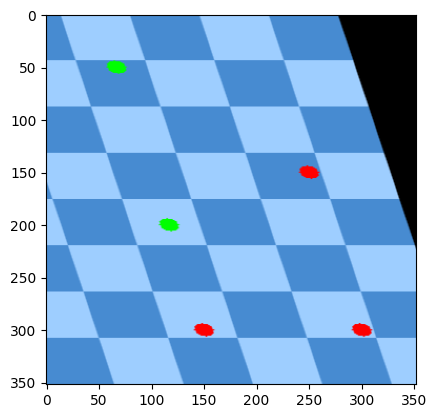

In [3]:
dst_affine = np.float32([(250, 150), (150, 300), (300, 300)])

M = cv2.getAffineTransform(points_affine, dst_affine)
result = cv2.warpAffine(img, M, img.shape[:2])

plt.imshow(result)

## Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function `cv.getPerspectiveTransform`. Then apply `cv.warpPerspective` with this 3x3 transformation matrix.

---

`cv2.getPerspectiveTransform(Mat src, Mat dst, int solveMethod=DECOMP_LU)`

**Description:** Calculates a perspective transform from four pairs of the corresponding points.

**Parameters:**

`src`: Coordinates of quadrangle vertices in the source image.

`dst`: Coordinates of the corresponding quadrangle vertices in the destination image.

`solveMethod`: Solving method

* `DECOMP_LU`: Gaussian elimination with the optimal pivot element chosen.
* `DECOMP_SVD`: Singular value decomposition (SVD) method; the system can be over-defined and/or the matrix src1 can be singular
* `DECOMP_EIG`: Eigenvalue decomposition; the matrix src1 must be symmetrical
* and some more...

**Return Value:** 3×3 matrix of a perspective transform which is to be passed to `cv2.warpPerspective`

---

`cv2.warpPerspective(Mat src, Mat dst, Mat M, Tuple[int, int] dsize, int flags=INTER_LINEAR, int borderMode=BORDER_CONSTANT, int borderValue=0)`

**Description:** Applies a perspective transformation to an image.

**Parameters:**

`src`: Input image.

`dst`: Output image that has the size dsize and the same type as src .

`M`: 3 x 3 transformation matrix.

`dsize`: Size of the output image.

`flags`: combination of interpolation methods (see InterpolationFlags) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( dst→src ).

* `INTER_AREA`: Resampling using pixel area relation
* `INTER_CUBIC`: Bicubic interpolation
* `INTER_LINEAR`: Bilinear interpolation
* `WARP_INVERSE_MAP`: Inverse transformation
* and some more...

`borderMode`: Pixel extrapolation method 

* `BORDER_CONSTANT `
* `BORDER_REPLICATE`
* `BORDER_TRANSPARENT`
* and some more...

`borderValue`: Value used in case of a constant border

**Return Value:** Transformed image.

---


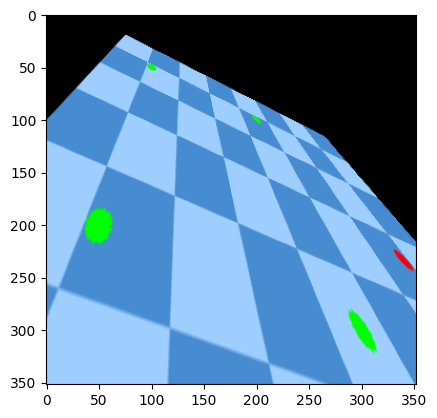

In [4]:
dst_homography = np.float32([(100, 50), (200, 100), (50, 200), (300, 300)])

M = cv2.getPerspectiveTransform(points_homography, dst_homography)
result = cv2.warpPerspective(img, M, img.shape[:2])

plt.imshow(result)